In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [74]:
# Constants to make behavior deterministic
RANDOM_STATE = 1
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## 1 
Use the breast cancer data set in python to create a training set. Label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the base rate of malignant cancer occurrence over the entire data set. In other words, what would be your best guess for the probability of malignant cancer of a single example using only the labels in the training set? 

In [75]:
# Load the dataset
cancer = load_breast_cancer()
# Print label names
# print("Label Names: {}".format(cancer.target_names))
# Extracting labels
labels = cancer.target
# Calculate base rate for malignant cancer 
malignant_count = np.sum(labels == 0)
base_rate = malignant_count / len(labels)
# Print the base rate in percentage
print("Base Rate for Malignant case: {:.2f}%".format(base_rate * 100))


Base Rate for Malignant case: 37.26%


In [76]:
# Print names of the features
# print("Feature Names: {}".format(cancer.feature_names))

## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this part we will complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of the decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 1 as the random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


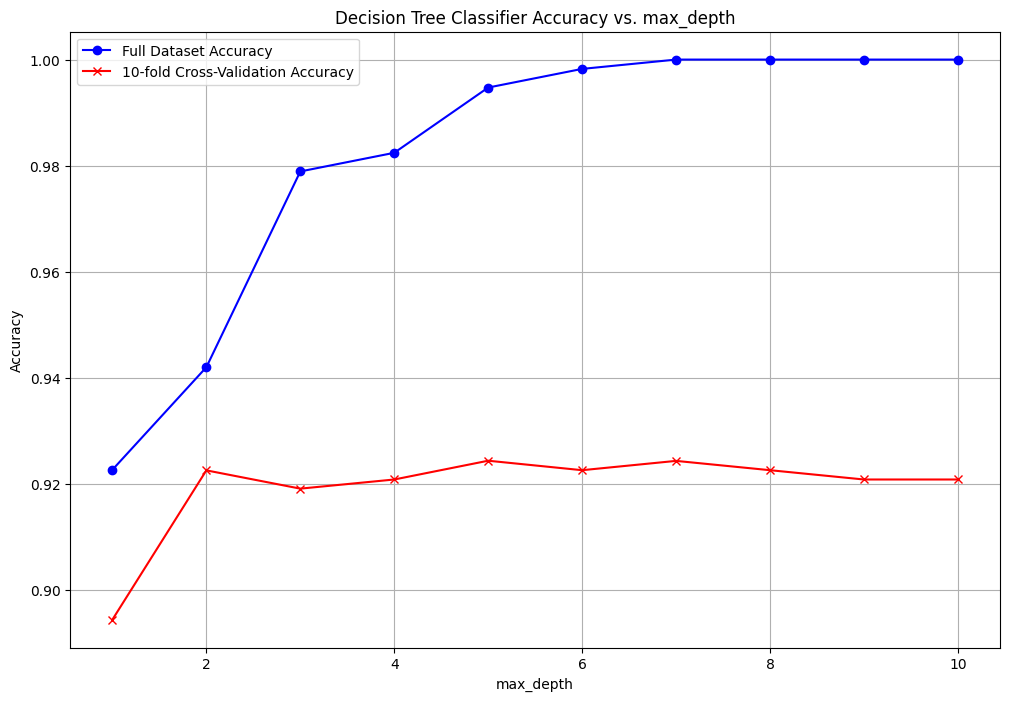

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Arrays to store accuracy values
full_dataset_accuracy = []
cross_val_accuracy = []

# Splitting the features and labels
X = cancer.data
y = cancer.target

# Setting up KFold for cross-validation
kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)

# Looping over max_depth values
for depth in range(1, 11):
    # Training and evaluating on the full dataset
    clf = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    clf.fit(X, y)
    full_dataset_accuracy.append(clf.score(X, y))
    
    # Evaluating using 10-fold cross-validation
    cross_val_scores = cross_val_score(clf, X, y, cv=kf)
    cross_val_accuracy.append(np.mean(cross_val_scores))

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(range(1, 11), full_dataset_accuracy, marker='o', color='b', label="Full Dataset Accuracy")
plt.plot(range(1, 11), cross_val_accuracy, marker='x', color='r', label="10-fold Cross-Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier Accuracy vs. max_depth")
plt.legend()
plt.grid(True)
plt.show()


### (b) 


**Observations:** 
The `max_depth` that give the best accuracy w.r.t. the **full-dataset** accuracy are {7, 8, 9, 10}, see code below.

The `max_depth` that give the best accuracy w.r.t. the **cross-validated** accuracy are {5}, see code below.



In [78]:
# Finding max_depth values that gave the highest full dataset accuracy
best_max_depth_full_dataset = [i+1 for i, acc in enumerate(full_dataset_accuracy) if acc == max(full_dataset_accuracy)]

# Finding max_depth values that gave the highest cross-validated accuracy
best_max_depth_cross_val = [i+1 for i, acc in enumerate(cross_val_accuracy) if acc == max(cross_val_accuracy)]

best_max_depth_full_dataset, best_max_depth_cross_val


([7, 8, 9, 10], [5])

## 3\. 
This part explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, we will use a `ensemble.RandomForestClassifier` and the best depth
found in 2(b) as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
we will use 1 as the random seed for the classifier and cross-validation.

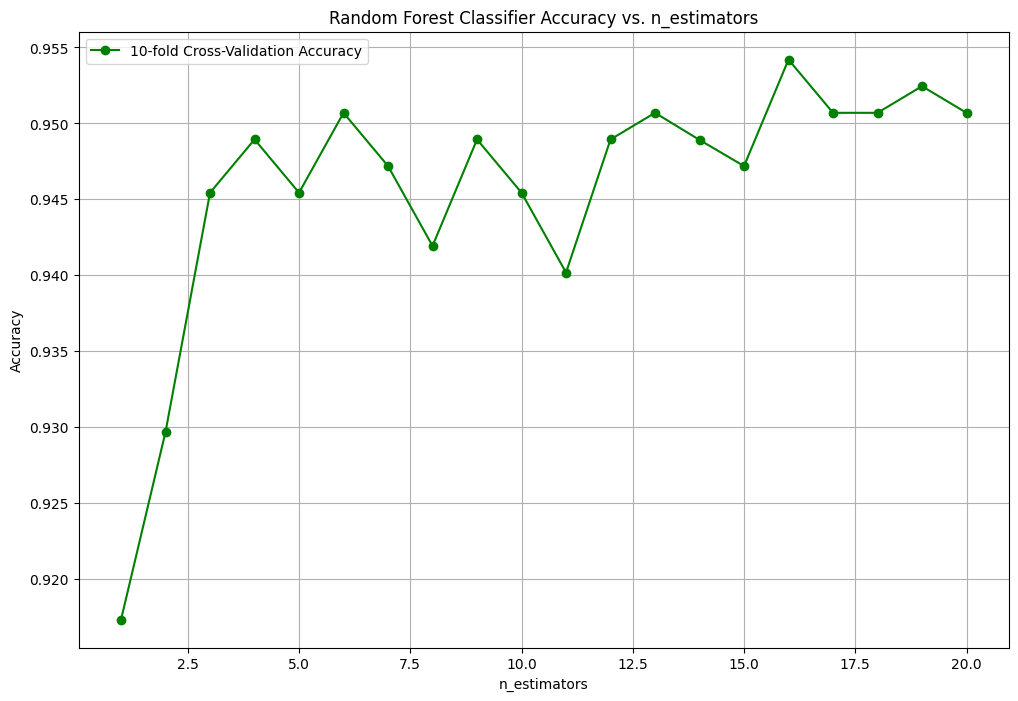

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Array to store cross-validated accuracy values
cross_val_accuracy_rf = []

# Optimal max_depth from 2(b)ii
optimal_max_depth = best_max_depth_cross_val[0] # This value is 5

# Looping over n_estimators values
for n_trees in range(1, 21):
    # Training and evaluating using 10-fold cross-validation
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=optimal_max_depth, random_state=RANDOM_STATE)
    cross_val_scores_rf = cross_val_score(rf, X, y, cv=kf)
    cross_val_accuracy_rf.append(np.mean(cross_val_scores_rf))

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(range(1, 21), cross_val_accuracy_rf, marker='o', color='g', label="10-fold Cross-Validation Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier Accuracy vs. n_estimators")
plt.grid(True)
plt.legend()
plt.show()

In [80]:
# Print accuracy values
# pprint.pprint(cross_val_accuracy_rf)

### (b) 
 As the number of trees `n_estimators` increases from 1 to 20, the accuracy generally increases (plot is trending upwards).
Hence using random forests, in this case, provides improvement in accuracy. 

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated accuracy?
 
Optimal n_estimators value: 16 <br>
Accuracy value corresponding to the optimal n_estimators value: 95.42% <br>
(see code below)

### (d) 
For the second plot we will again use `ensemble.RandomForestClassifier`, but this time
we will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, we will only plot the results
from cross-validation and not the full set, but the plot will be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, 1 is the random seed.

In [81]:
## Code for 3(c) ##
# Calculate the optimal n_estimators value
optimal_n_estimators = [i+1 for i, acc in enumerate(cross_val_accuracy_rf) if acc == max(cross_val_accuracy_rf)]
print("Optimal n_estimators value: {}".format(optimal_n_estimators[0]))
# Print the accuracy value corresponding to the optimal n_estimators value
print("Accuracy value corresponding to the optimal n_estimators value: {:.2f}%".format(max(cross_val_accuracy_rf) * 100))


Optimal n_estimators value: 16
Accuracy value corresponding to the optimal n_estimators value: 95.42%


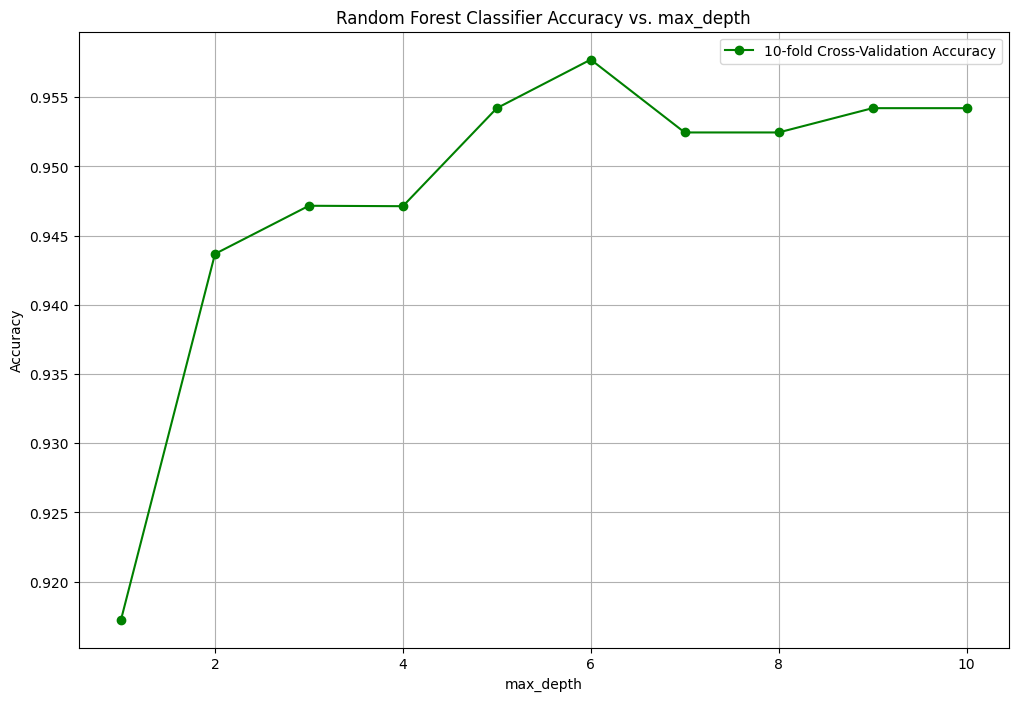

In [82]:
## Code for 3(d) ##
# Array to store cross-validated accuracy values for varying max_depth
cross_val_accuracy_rf_depth = []

# Optimal n_estimators from 3(c)
optimal_n_estimator = optimal_n_estimators[0] # This value is 16

# Looping over max_depth values
for depth in range(1, 11):
    # Training and evaluating using 10-fold cross-validation
    rf_depth = RandomForestClassifier(n_estimators=optimal_n_estimator, max_depth=depth, random_state=RANDOM_STATE )
    cross_val_scores_rf_depth = cross_val_score(rf_depth, X, y, cv=kf)
    cross_val_accuracy_rf_depth.append(np.mean(cross_val_scores_rf_depth))

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(range(1, 11), cross_val_accuracy_rf_depth, marker='o', color='g', label="10-fold Cross-Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier Accuracy vs. max_depth")
plt.grid(True)
plt.legend()
plt.show()


In [83]:
# Finding max_depth values that gave the highest cross-validated accuracy
best_max_depth_cross_val = [i+1 for i, acc in enumerate(cross_val_accuracy_rf_depth) if acc == max(cross_val_accuracy_rf_depth)]
best_max_depth_cross_val

# Print the max_depth value that gave the highest cross-validated accuracy and the corresponding accuracy value
print("max_depth value that gave the highest cross-validated accuracy: {}".format(best_max_depth_cross_val[0]))
print("Accuracy value corresponding to the max_depth value: {:.2f}%".format(max(cross_val_accuracy_rf_depth) * 100))

max_depth value that gave the highest cross-validated accuracy: 6
Accuracy value corresponding to the max_depth value: 95.77%


### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

No, they are not the same.<br>
For part 2(b), the optimal 'max_depth' was 5.<br>
For part 3(d), the optimal 'max_depth' is 6.<br>

## 4\. 
For this last part, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, we will use the same random state value for our classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

In [84]:
# Create a dictionary to store counts of best max depths for each random state
best_max_depth_counts = defaultdict(int)

# Loop through random state values from 0 to 99
for random_state in range(100):
    
    # Set up KFold with current random state
    kf = KFold(n_splits=10, random_state=random_state, shuffle=True)
    
    # Store cross validation scores for each depth
    cross_val_scores_for_depth = []
    
    # Loop through max_depth values from 1 to 10
    for depth in range(1, 11):
        
        # Initialize classifier with current depth and random state
        clf = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
        
        # Compute cross validation score
        cross_val_scores = cross_val_score(clf, X, y, cv=kf)
        cross_val_scores_for_depth.append(np.mean(cross_val_scores))
    
    # Get max depth values that gave the highest cross-validated accuracy for this random state
    best_max_depth_for_random_state = [i+1 for i, acc in enumerate(cross_val_scores_for_depth) if acc == max(cross_val_scores_for_depth)]
    
    # Record the count for each best max depth
    for depth in best_max_depth_for_random_state:
        best_max_depth_counts[depth] += 1

best_max_depth_counts




defaultdict(int, {7: 11, 4: 30, 6: 26, 2: 4, 5: 37, 3: 5, 8: 3, 9: 2, 10: 2})

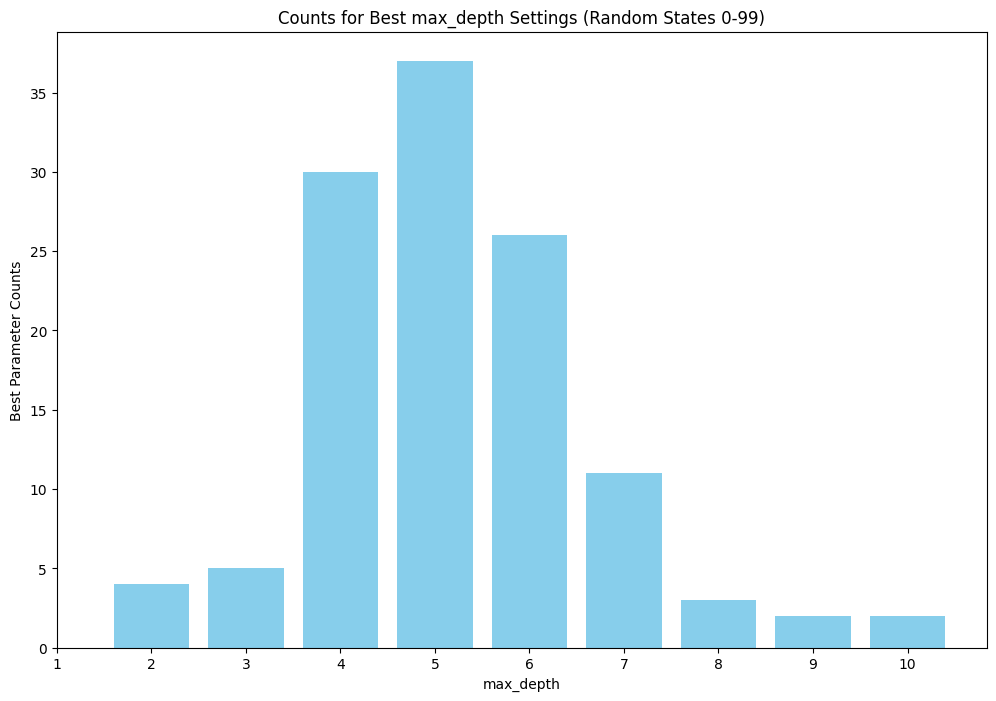

In [85]:
# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.bar(best_max_depth_counts.keys(), best_max_depth_counts.values(), color='skyblue')
plt.xlabel("max_depth")
plt.ylabel("Best Parameter Counts")
plt.title("Counts for Best max_depth Settings (Random States 0-99)")
plt.xticks(list(range(1, 11)))
plt.show()


### (b) 
What are the top two most frequent parameter settings?

The most frequent paramter settings (i.e., max_depth) are 5 and 4.